In [1]:
# @title Data Loading
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Final Data.csv')  # Adjust path for Colab if needed

# Drop the unnamed index column if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44934 entries, 0 to 44933
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer Name      44934 non-null  object
 1   Customer Location  44934 non-null  object
 2   Review Text        44934 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB
None
       Customer Name Customer Location  \
0    Sarah Hoelscher                US   
1      Bruce Winslow                CR   
2      Kelly Wilmeth                US   
3  Stephanie LeBlanc                US   
4                JPD                US   

                                         Review Text  
0                  Easy to use and understand! Qu...  
1                  It was a real pleasure to spea...  
2                  Byron Preston was super helpfu...  
3                  Byron Preston was amazing walk...  
4                  Thanks Josh, top rate service ...  


Null values per column:
 Customer Name        0
Customer Location    0
Review Text          0
dtype: int64
Number of duplicate reviews: 207
count    40381.000000
mean        27.146950
std         29.882038
min          1.000000
25%         11.000000
50%         19.000000
75%         34.000000
max        866.000000
Name: Review Length, dtype: float64


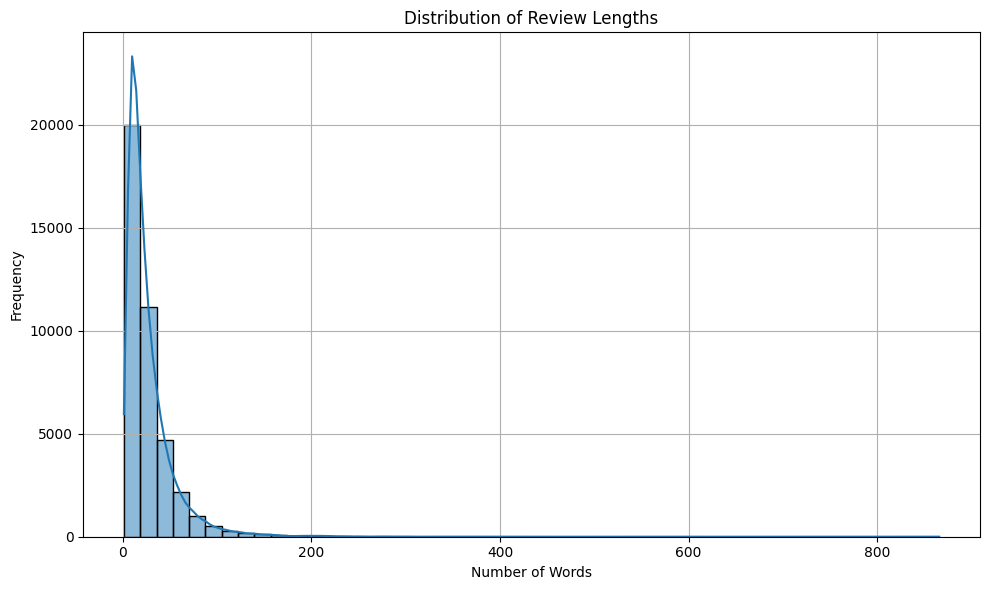

In [8]:
# Reference:
# “Exploratory Data Analysis (EDA) Using Python” [YouTube Video].
# Retrieved from https://www.youtube.com/watch?v=-o3AxdVcUtQ

# @title EDA & Data cleaning
# Check for null values
print("Null values per column:\n", df.isnull().sum())

# Check for duplicate reviews
print("Number of duplicate reviews:", df.duplicated(subset='Review Text').sum())

# Drop duplicate reviews if needed
df = df.drop_duplicates(subset='Review Text')
df = df.reset_index(drop=True)

# Add column for review length (number of words)
df['Review Length'] = df['Review Text'].apply(lambda x: len(x.split()))

# Describe review length
print(df['Review Length'].describe())

# Plot review length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In this step, I performed exploratory data analysis (EDA) and basic data cleaning on the customer reviews dataset. I first checked for null values and found that there were no missing entries in any of the key columns: Customer Name, Customer Location, or Review Text. I then checked for and removed 207 duplicate reviews to ensure each review was unique. After that, I added a new column to calculate the length of each review in terms of word count. The analysis showed that the dataset contains 40,381 reviews with an average length of approximately 27 words. The shortest review was just 1 word, while the longest had 866 words. Most reviews ranged between 11 and 34 words, with a median length of 19 words. Finally, I visualised the distribution of review lengths using a histogram, which provided a clearer picture of how review lengths vary across the dataset.

In [9]:
# Code inspired by:
# "How to Clean Text Data on Python (Code-along)" by Fervent
# YouTube link: https://www.youtube.com/watch?v=CiNgWa999eQ
# Accessed on: 24 June 2025

# @title Text cleaning for NLP
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Define cleaner function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    text = text.strip()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
df['Cleaned Text'] = df['Review Text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In this step, I cleaned the customer review text data to prepare it for natural language processing (NLP). The cleaning process involved converting all text to lowercase, removing URLs, HTML tags, punctuation, and numbers to eliminate noise. I then split the text into individual words (tokens), removed common English stopwords (e.g., “the”, “is”, “and”), and applied lemmatisation to reduce each word to its base form (e.g., “running” to “run”). This helped standardise the text and reduce redundancy. The cleaned version of each review was stored in a new column called Cleaned Text, which was used for all further analysis.

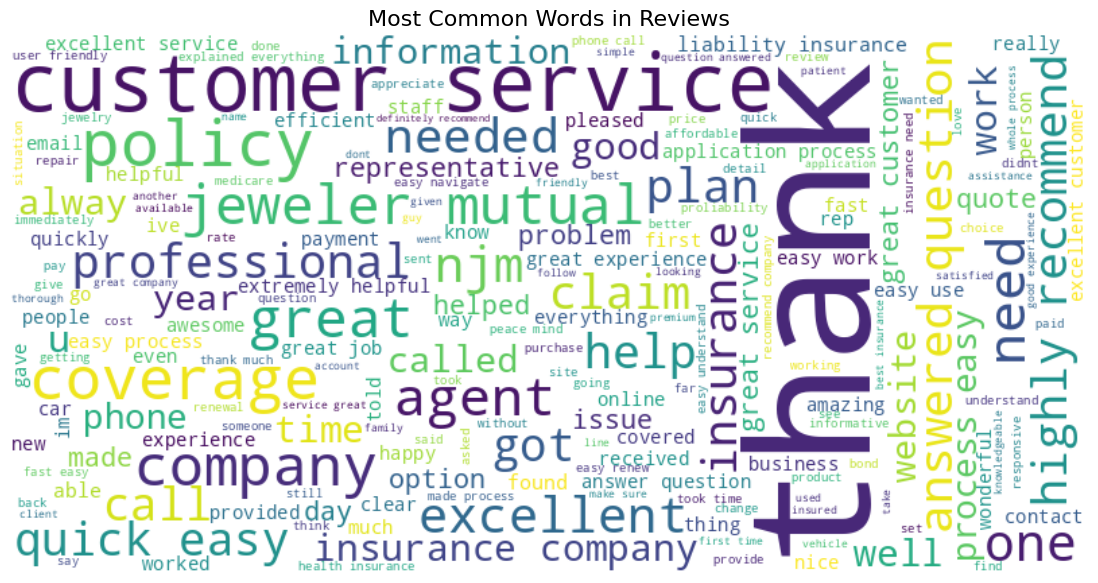

In [10]:
# Code inspired by:
# "Find the Most COMMON Words with Python WordCloud" by Data with Dylan
# YouTube link: https://www.youtube.com/watch?v=jB1XMrv_dCA
# Accessed on: June 24 2025

# @title wordcloud and frequent words
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned Text']))

# Display
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews", fontsize=16)
plt.show()


In this step, I generated a word cloud to visualise the most frequently occurring words in the cleaned customer reviews. A word cloud is a visual representation where words that appear more often are displayed in larger font sizes. Using the WordCloud library, I combined all the cleaned review text into a single string and created a word cloud image, which highlighted the most common terms used by customers. This visualisation helped to quickly identify prominent themes and topics in the feedback, such as frequently mentioned services, products, or customer experiences.

In [11]:
# @title Topic Modelling with LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Vectorize cleaned text
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['Cleaned Text'])

# Step 2: Fit LDA Model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Step 3: Display Topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Print top 10 words per topic
no_top_words = 10
display_topics(lda_model, vectorizer.get_feature_names_out(), no_top_words)


Topic #1:
easy process jeweler quick insurance mutual coverage jewelry use simple

Topic #2:
njm claim car helpful process experience year quickly company professional

Topic #3:
helpful plan question insurance need best help knowledgeable helped agent

Topic #4:
insurance policy time email company phone coverage day year called

Topic #5:
service great customer excellent helpful company professional good recommend thank


In this section, I used Latent Dirichlet Allocation (LDA) to uncover hidden topics within the cleaned customer reviews. First, the reviews were converted into a document-term matrix using CountVectorizer, filtering out very common and very rare words. Then, an LDA model was applied to group frequently co-occurring words into five distinct topics. Each topic represents a theme commonly discussed by customers. For example, Topic 1 focuses on the simplicity and speed of the insurance process, especially related to jewelry. Topic 2 highlights experiences with NJM car claims and professionalism. Topic 3 centers around helpful agents and customer questions. Topic 4 reflects communication about policies through email or phone. Lastly, Topic 5 captures overall customer satisfaction with words like “great,” “excellent,” and “recommend.” These topics help identify the main areas of focus and concern in customer feedback, supporting deeper understanding of their experiences.

In [12]:
# @title Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER to cleaned reviews
df['Sentiment Score'] = df['Review Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Label sentiment
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment Label'] = df['Sentiment Score'].apply(label_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In this step, I performed sentiment analysis on the customer reviews using VADER (Valence Aware Dictionary and sEntiment Reasoner), a pre-trained sentiment analysis tool from the NLTK library. Each review was scored based on its emotional tone using VADER's compound score, which ranges from -1 (most negative) to +1 (most positive). Based on this score, each review was labeled as Positive (score ≥ 0.05), Negative (score ≤ -0.05), or Neutral (score between -0.05 and 0.05). These sentiment labels were stored in a new column called Sentiment Label, allowing for further analysis of how customers feel about their experiences with the medical aid provider.

/tmp/ipython-input-13-1567874156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment Label', order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')


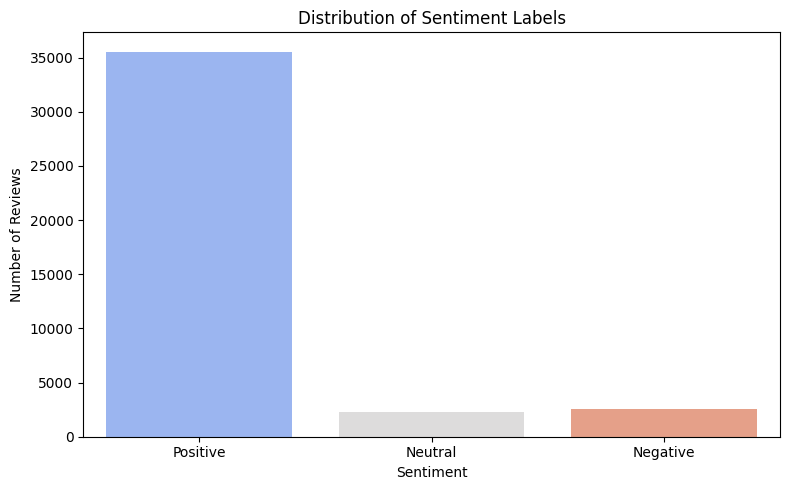

In [13]:
# Code inspired by:
# "Bar Graph | Bar Chart | Matplotlib | Python Tutorials" by Amulya's academy
# YouTube link: https://www.youtube.com/watch?v=Go0jBRVqmEI
# Accessed on: 24 June 2025

# @title Visualising Sentiment Distribution
# Plot sentiment counts
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment Label', order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

In this step, I visualised the distribution of sentiment labels using a bar chart to understand the overall emotional tone of customer feedback. The chart showed the number of reviews classified as Positive, Neutral, or Negative based on earlier sentiment analysis. The bar graph revealed that the vast majority of reviews (around 35,000) were positive, while approximately 2,500 were neutral and just above 2,500 were negative. This indicates that while customer sentiment is generally favorable, there is a small but important group of customers expressing dissatisfaction or indifference, which may point to specific service areas needing attention.

In [14]:
# @title Feature Extraction and Selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Define features and target
X = df['Cleaned Text']
y = df['Sentiment Label']  # Target: 'Positive', 'Neutral', 'Negative'

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

In this step, I prepared the cleaned text data for machine learning by converting it into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. The cleaned review text was used as the input feature (X), and the corresponding sentiment labels (Positive, Neutral, Negative) were used as the target variable (y). The TfidfVectoriser transformed the text into a matrix of weighted word frequencies, capturing the importance of each word (and word pair, using unigrams and bigrams) relative to the entire dataset. The vectorizer was limited to the top 5,000 most relevant features to reduce complexity while retaining the most informative terms. This transformed data was then used to train the sentiment classification model.

In [15]:
# Code inspired by:
# "Complete Guide to Cross Validation" by Rob Mulla
# YouTube link: https://www.youtube.com/watch?v=-8s9KuNo5SA
# Accessed on: June 24, 2025

# @title Cross Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Set up model
model = LogisticRegression(max_iter=1000)

# Use Stratified K-Fold to maintain label balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation
scores = cross_val_score(model, X_tfidf, y, cv=cv, scoring='accuracy')

# Display accuracy per fold and average
print("Cross-validation accuracies per fold:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation accuracies per fold: [0.91754364 0.91617137 0.91740961 0.91456166 0.9179049 ]
Mean CV Accuracy: 0.9167182381465467


In this step, I evaluated the performance of the sentiment classification model using Stratified K-Fold Cross-Validation to ensure that the class distribution (Positive, Neutral, Negative) was preserved in each fold. A Logistic Regression model was chosen for its effectiveness and simplicity, with the maximum iteration limit set to 1000 for better convergence. The dataset was split into 5 folds, with the model trained and tested on different folds in rotation. The accuracy scores for each fold were recorded to assess consistency. The model achieved accuracies of approximately 91.75%, 91.62%, 91.74%, 91.46%, and 91.79% across the five folds, with a mean cross-validation accuracy of about 91.67%. These results indicate that the model performs reliably and generalises well across different subsets of the data.

              precision    recall  f1-score   support

    Negative       0.75      0.41      0.53       507
     Neutral       0.87      0.30      0.45       458
    Positive       0.92      0.99      0.95      7112

    accuracy                           0.91      8077
   macro avg       0.85      0.57      0.64      8077
weighted avg       0.91      0.91      0.90      8077



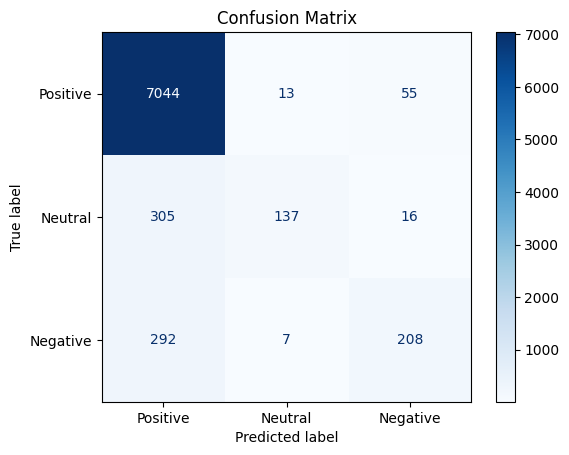

In [16]:
# Code inspired by:
# "Python Machine Learning Mini Series - SkLearn Confusion Matrix" by MarinatedPython
# YouTube link: https://www.youtube.com/watch?v=87Zebzxzh-A
# Accessed on: June 24, 2025

# @title Model Training
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train/test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)

# Fit model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In this step, I split the dataset into training and testing sets using an 80/20 stratified split to maintain the proportion of sentiment labels in both sets. A Logistic Regression model was then trained on the training data using the TF-IDF features. After training, the model made predictions on the test set to evaluate its performance on unseen data. The evaluation included generating a classification report showing precision, recall, and F1-score for each sentiment class, which provides detailed insight into how well the model distinguishes between positive, neutral, and negative reviews. Additionally, a confusion matrix was plotted to visually represent the number of correct and incorrect predictions across each class, helping to identify where the model performs well and where it may struggle.